# Project Description

Being able to create predictive models is very cool, but translating fancy models into real business value is a major challenge if the training data isn't stored efficiently.

You've been hired by a major online data science training provider to store their data much more efficiently, so they can create a model that predicts if course enrollees are looking for a job. You'll convert data types, create ordered categories, and filter ordered categorical data so the data is ready for modeling.

# Context and objective

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called Training Data Ltd. to **clean up** one of their largest customer datasets. This dataset will eventually be used to **predict whether their students are looking for a new job or not**, information that they will then use to direct them to prospective recruiters.


# Dataset

You've been given access to <code>customer_train.csv</code>, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| **Column**             | **Description**                                                              |
|------------------------|------------------------------------------------------------------------------|
| student_id             | A unique ID for each student.                                                |
| city                   | A code for the city the student lives in.                                    |
| city_development_index | A scaled development index for the city.                                     |
| gender                 | The student's gender.                                                        |
| relevant_experience    | An indicator of the student's work relevant experience.                      |
| enrolled_university    | The type of university course enrolled in (if any).                          |
| education_level        | The student's education level.                                               |
| major_discipline       | The educational discipline of the student.                                   |
| experience             | The student's total work experience (in years).                              |
| company_size           | The number of employees at the student's current employer.                   |
| last_new_job           | The number of years between the student's current and previous jobs.         |
| training_hours         | The number of hours of training completed.                                   |
| job_change             | An indicator of whether the student is looking for a new job (1) or not (0). |

Read dataset from kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copy credencials of kaggle to correct place

In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ./
!chmod 600 ~/.kaggle/kaggle.json
print("ok")

ok


 create folder of kaggle with url of dataset

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/mustafagerme/customer-train")

Skipping, found downloaded files in "./customer-train" (use force=True to force download)


# Table of contents

The Head Data Scientist at Training Data Ltd. has asked you to create a DataFrame called <code>ds_jobs_clean</code> that stores the data in <code>customer_train.csv</code> much more efficiently. Specifically, they have set the following requirements:

- Columns containing integers must be stored as 32-bit integers (<code>int32</code>).

- Columns containing floats must be stored as 16-bit floats (<code>float16</code>).
Columns containing nominal categorical data must be stored as the category data type.

- Columns containing ordinal categorical data must be stored as ordered categories, and not mapped to numerical values, with an order that reflects the natural order of the column.

- The columns of <code>ds_jobs_clean</code> must be in the same order as the original dataset.

- The DataFrame should be filtered to only contain students with 10 or more years of experience at companies with at least 1000 employees, as their recruiter base is suited to more experienced professionals at enterprise companies.

If you call <code>.info()</code> or <code>.memory_usage()</code> methods on <code>ds_jobs</code> and <code>ds_jobs_clean</code> after you've preprocessed it, you should notice a substantial decrease in memory usage.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

# Read data file

In [ ]:
# Read data (cvs file)

file =('/content/customer-train/customer_train.csv')
df = pd.read_csv(file)
# , index_col=0


In [ ]:
#let's set the precision to 2 decimal places
# pd.set_option('display.precision', 2)

#the first 3 rows of our pandas DataFrame object
#if we run df.head(), display the first 5 rows by default

ds_jobs = df.copy() # to save df as ds_jobs

ds_jobs.head(3)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0


In [ ]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [ ]:
ds_jobs.memory_usage()

Index                        128
student_id                153264
city                      153264
city_development_index    153264
gender                    153264
relevant_experience       153264
enrolled_university       153264
education_level           153264
major_discipline          153264
experience                153264
company_size              153264
company_type              153264
last_new_job              153264
training_hours            153264
job_change                153264
dtype: int64

In [ ]:
# do a new copy of ds_jobs to start the clean and have the original saved

ds_jobs_clean = ds_jobs.copy()
ds_jobs_clean.head(3)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0


# Columns containing integers must be stored as 32-bit integers (<code>int32</code>)

In [ ]:
# select columns student_id, training_hours and job_change
int_variables = ['student_id', 'training_hours','job_change'] # list of features integers
print(ds_jobs_clean[int_variables].dtypes) # validate type of features

ds_jobs_clean[int_variables] = ds_jobs_clean[int_variables].astype(dtype='int32')
print(ds_jobs_clean[int_variables].dtypes) # validate type of features


student_id        int64
training_hours    int64
job_change        int64
dtype: object
student_id        int32
training_hours    int32
job_change        int32
dtype: object


# Columns containing floats must be stored as 16-bit floats (<code>float16</code>).

In [ ]:
# select columns student_id, training_hours and job_change
float_variables = ['city_development_index'] # list of features float
print(ds_jobs_clean[float_variables].dtypes) # validate type of features

ds_jobs_clean[float_variables] = ds_jobs_clean[float_variables].astype(dtype='float16')
print(ds_jobs_clean[float_variables].dtypes) # validate type of features

city_development_index    float64
dtype: object
city_development_index    float16
dtype: object


# Columns containing nominal categorical data must be stored as the category data type.

# Why use categorical datatypes in pandas?

- Memory usage — for string columns where there are many repeated values, categories can drastically reduce the amount of memory required to store the data in memory

- Runtime performance — there are optimizations in place which can improve execution speed for certain operations

- Library integrations — in some cases libraries have special functionality for categorical columns, for example lightgbm handles categorical columns differently when building models

In [ ]:
# select columns student_id, training_hours and job_change
# object_variables = [ "gender","relevant_experience", "enrolled_university", "education_level",
# "major_discipline", "experience", "company_size", "company_type", "last_new_job"]

ds_jobs_clean['gender'].dtype #dtype('0')

object_variables = [col for col in ds_jobs_clean.columns if ds_jobs_clean[col].dtype == 'O']
print(object_variables)

# list of features nominal
print(ds_jobs_clean[object_variables].dtypes) # validate type of features

ds_jobs_clean[object_variables] = ds_jobs_clean[object_variables].astype(dtype='category')
print(ds_jobs_clean[object_variables].dtypes) # validate type of features

['city', 'gender', 'relevant_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
city                   object
gender                 object
relevant_experience    object
enrolled_university    object
education_level        object
major_discipline       object
experience             object
company_size           object
company_type           object
last_new_job           object
dtype: object
city                   category
gender                 category
relevant_experience    category
enrolled_university    category
education_level        category
major_discipline       category
experience             category
company_size           category
company_type           category
last_new_job           category
dtype: object


# Columns containing ordinal categorical data must be stored as ordered categories, and not mapped to numerical values, with an order that reflects the natural order of the column.

In [ ]:
print(ds_jobs_clean[object_variables].head(3))

       city gender      relevant_experience enrolled_university  \
0  city_103   Male  Has relevant experience       no_enrollment   
1   city_40   Male   No relevant experience       no_enrollment   
2   city_21    NaN   No relevant experience    Full time course   

  education_level major_discipline experience company_size company_type  \
0        Graduate             STEM        >20          NaN          NaN   
1        Graduate             STEM         15        50-99      Pvt Ltd   
2        Graduate             STEM          5          NaN          NaN   

  last_new_job  
0            1  
1           >4  
2        never  


In [ ]:
# unique values at each column categorical
col=object_variables
for col in ds_jobs_clean:
    print(f'{col.upper()}'.center(50, '*'))
    print(f'{col}: {ds_jobs_clean[col].unique()}', '\n')

********************STUDENT_ID********************
student_id: [ 8949 29725 11561 ... 24576  5756 23834] 

***********************CITY***********************
city: ['city_103', 'city_40', 'city_21', 'city_115', 'city_162', ..., 'city_121', 'city_129', 'city_8', 'city_31', 'city_171']
Length: 123
Categories (123, object): ['city_1', 'city_10', 'city_100', 'city_101', ..., 'city_94', 'city_97',
                           'city_98', 'city_99'] 

**************CITY_DEVELOPMENT_INDEX**************
city_development_index: [0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745

In [ ]:
ordered_categories = {
    'relevant_experience': ['Has relevant experience', 'No relevant experience'],
    'enrolled_university': ['no_enrollment', 'Part time course', 'Full time course'],
    'education_level': [ 'Primary School','High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + list(map(str, range(1, 21)))+ ['>20'],
    'company_size': ['<10', '10-49', '50-99', '100-499', '500-999','1000-4999', '5000-9999','10000+' ] ,
    'last_new_job': ['never','1', '2', '3', '4', '>4']
}

for col in ds_jobs_clean:
    for col in ordered_categories.keys():
        category = pd.CategoricalDtype(ordered_categories[col], ordered=True)
        ds_jobs_clean[col] = ds_jobs_clean[col].astype(category)

print(ds_jobs_clean.head(3))

   student_id      city  city_development_index gender  \
0        8949  city_103                0.919922   Male   
1       29725   city_40                0.775879   Male   
2       11561   city_21                0.624023    NaN   

       relevant_experience enrolled_university education_level  \
0  Has relevant experience       no_enrollment        Graduate   
1   No relevant experience       no_enrollment        Graduate   
2   No relevant experience    Full time course        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM        >20          NaN          NaN            1   
1             STEM         15        50-99      Pvt Ltd           >4   
2             STEM          5          NaN          NaN        never   

   training_hours  job_change  
0              36           1  
1              47           0  
2              83           0  


# The DataFrame should be filtered to only contain students with 10 or more years of experience at companies with at least 1000 employees, as their recruiter base is suited to more experienced professionals at enterprise companies.

In [ ]:
ds_jobs_clean_exp_10_CompSize_1000 = ds_jobs_clean.copy() # to have a df with students with more than 10 years and company size gt 1000
ds_jobs_clean_exp_10_CompSize_1000 = ds_jobs_clean[(ds_jobs_clean['experience']>='10') & (ds_jobs_clean['company_size']>='1000-4999')]

ds_jobs_clean_exp_10_CompSize_1000.head(3)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
9,699,city_103,0.919922,NaN,Has relevant experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0
12,25619,city_61,0.913086,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0
31,22293,city_103,0.919922,Male,Has relevant experience,Part time course,Graduate,STEM,19,5000-9999,Pvt Ltd,>4,141,0


# If you call <code>.info()</code> or <code>.memory_usage()</code> methods on <code>ds_jobs</code> and <code>ds_jobs_clean</code> after you've preprocessed it, you should notice a substantial decrease in memory usage.

In [ ]:
print(ds_jobs.info(), '\n')
print(ds_jobs_clean.info(), '\n')

print(ds_jobs.memory_usage(), '\n')
print(ds_jobs_clean.memory_usage(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [ ]:
for col in ds_jobs_clean:
    print(f'{col.upper()}'.center(50, '*'))
    print(f'{col}: {ds_jobs_clean[col].unique()}', '\n')

********************STUDENT_ID********************
student_id: [  699 25619 22293 ... 32932  3365 33047] 

***********************CITY***********************
city: ['city_103', 'city_61', 'city_16', 'city_114', 'city_97', ..., 'city_143', 'city_39', 'city_142', 'city_20', 'city_93']
Length: 82
Categories (123, object): ['city_1', 'city_10', 'city_100', 'city_101', ..., 'city_94', 'city_97',
                           'city_98', 'city_99'] 

**************CITY_DEVELOPMENT_INDEX**************
city_development_index: [0.92  0.913 0.91  0.926 0.925 0.893 0.769 0.939 0.903 0.897 0.878 0.896
 0.766 0.776 0.924 0.698 0.895 0.624 0.804 0.855 0.794 0.691 0.884 0.555
 0.738 0.899 0.754 0.743 0.949 0.915 0.923 0.89  0.762 0.887 0.802 0.84
 0.843 0.682 0.68  0.64  0.847 0.479 0.827 0.836 0.74  0.763 0.742 0.921
 0.848 0.866 0.789 0.689 0.55  0.647 0.666 0.775 0.767 0.795 0.83  0.518
 0.722 0.856 0.898 0.727 0.796 0.865] 

**********************GENDER**********************
gender: [NaN, 'Male', 'Fe

In [ ]:
ds_jobs_clean.columns

Index(['student_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

# EDA for Categorical Variables

## Create a separate dataframe which has only Categorical Variables¶

In [ ]:
ds_jobs_clean_cat= ds_jobs_clean.select_dtypes(include='category').copy()
ds_jobs_clean_cat.head(3)

,city,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never


In [ ]:
nrow, ncol = ds_jobs_clean_cat.shape
nrow, ncol

(19158, 10)

## Basic stat for each variable

Look the different values of distinct categories in variable <code>relevant_experience</code>. The following method will list down any missing values(nan) as well

In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona',
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in ds_jobs_clean_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [ds_jobs_clean_cat[c].unique()] #distinct values
    tmp['values_count_incna'] = len(list(ds_jobs_clean_cat[c].unique())) #count including nan
    tmp['values_count_nona'] = int(ds_jobs_clean_cat[c].nunique()) # count without nan
    tmp['num_miss'] = ds_jobs_clean_cat[c].isnull().sum() # nr of missing info
    tmp['pct_miss'] = (ds_jobs_clean_cat[c].isnull().sum()/ len(ds_jobs_clean_cat)).round(3)*100 #percentage of missing info
    ds_cat_stats = pd.concat([ds_cat_stats, tmp], ignore_index=True)

ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,city,"['city_103', 'city_40', 'city_21', 'city_115',...",123,123,0,0.0
1,gender,"['Male', NaN, 'Female', 'Other'] Categories (3...",4,3,4508,23.5
2,relevant_experience,"['Has relevant experience', 'No relevant exper...",2,2,0,0.0
3,enrolled_university,"['no_enrollment', 'Full time course', NaN, 'Pa...",4,3,386,2.0
4,education_level,"['Graduate', 'Masters', 'High School', NaN, 'P...",6,5,460,2.4
5,major_discipline,"['STEM', 'Business Degree', NaN, 'Arts', 'Huma...",7,6,2813,14.7
6,experience,"['>20', '15', '5', '<1', '11', ..., '6', '9', ...",23,22,65,0.3
7,company_size,"[NaN, '50-99', '<10', '10000+', '5000-9999', '...",9,8,5938,31.0
8,company_type,"[NaN, 'Pvt Ltd', 'Funded Startup', 'Early Stag...",7,6,6140,32.0
9,last_new_job,"['1', '>4', 'never', '4', '3', '2', NaN] Categ...",7,6,423,2.2


In [ ]:
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
ds_cat_stats.set_index('column', inplace = True)
ds_cat_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
relevant_experience,"['Has relevant experience', 'No relevant exper...",2,2,0,0.0
job_change,"[1, 0]",2,2,0,0.0
gender,"['Male', NaN, 'Female', 'Other'] Categories (3...",4,3,4508,23.5
enrolled_university,"['no_enrollment', 'Full time course', NaN, 'Pa...",4,3,386,2.0
education_level,"['Graduate', 'Masters', 'High School', NaN, 'P...",6,5,460,2.4
major_discipline,"['STEM', 'Business Degree', NaN, 'Arts', 'Huma...",7,6,2813,14.7
company_type,"[NaN, 'Pvt Ltd', 'Funded Startup', 'Early Stag...",7,6,6140,32.0
last_new_job,"['1', '>4', 'never', '4', '3', '2', NaN] Categ...",7,6,423,2.2
company_size,"[NaN, '50-99', '<10', '10000+', '5000-9999', '...",9,8,5938,31.0


The idea here is to familiarize ourself with data just enough. And also to make mental notes

**Quick Observations**

look at the Variable 'gender' -- distinct categories are 4 but without nans it is 3. [Mental Note : label encoding or one-hot encoding]
Last 2 variables - experience, city have more than 10 categories. [Mental Note : We should keep this in mind while doing the dummy variable coding]
3 variables have more than 30% missing values.

In [ ]:
ds_cat_stats.sort_values(by = 'pct_miss', ascending = False).head(5)

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
company_type,"[NaN, 'Pvt Ltd', 'Funded Startup', 'Early Stag...",7,6,6140,32.0
company_size,"[NaN, '50-99', '<10', '10000+', '5000-9999', '...",9,8,5938,31.0
gender,"['Male', NaN, 'Female', 'Other'] Categories (3...",4,3,4508,23.5
major_discipline,"['STEM', 'Business Degree', NaN, 'Arts', 'Huma...",7,6,2813,14.7
education_level,"['Graduate', 'Masters', 'High School', NaN, 'P...",6,5,460,2.4


## Frequency distribution

<Axes: xlabel='enrolled_university', ylabel='count'>

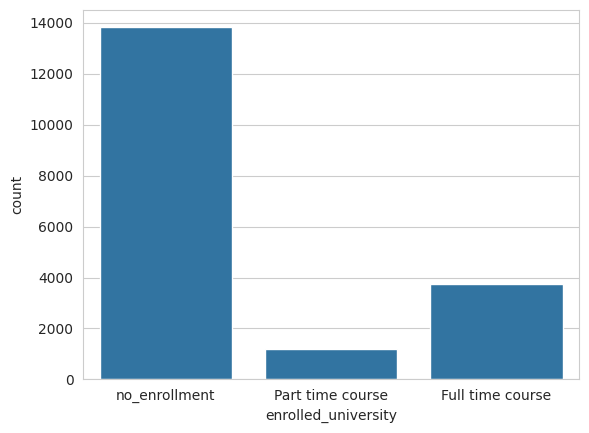

In [ ]:
sns.countplot(data=ds_jobs_clean_cat, x='enrolled_university')

Since we are working on a supervised ML problem we should also look at the relationshipt between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [ ]:
#add variable 'job_change' to df ds_jobs_clean_cat
ds_jobs_clean_cat['job_change'] = ds_jobs_clean.loc[ds_jobs_clean_cat.index, 'job_change'].copy()
ds_jobs_clean_cat.columns

Index(['city', 'gender', 'relevant_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'job_change'],
      dtype='object')

In [ ]:
len(ds_jobs_clean_cat.columns) #11 variables

11

In [ ]:
# Create a dataframe with the counts by gender and job change
counts_df = ds_jobs_clean_cat.groupby(["gender", "job_change"])["city"].count().unstack()
counts_df

job_change,0,1
gender,,
Female,912,326
Male,10209,3012
Other,141,50


In [ ]:

# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

gender,Female,Male,Other
job_change,,,
0,0.080980,0.90650,0.012520
1,0.096222,0.88902,0.014758


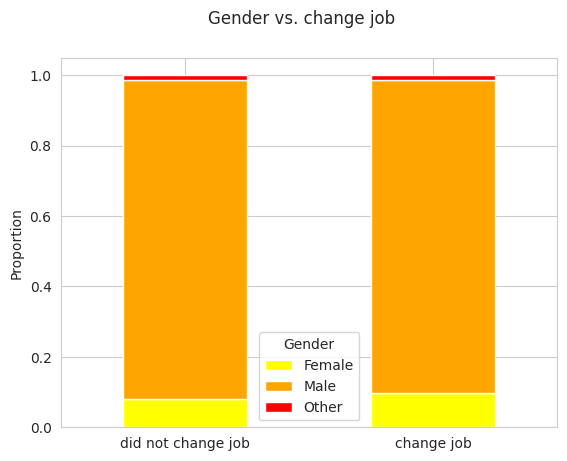

In [ ]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Gender")
ax.set_xticklabels(["did not change job", "change job"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Gender vs. change job");

In [ ]:
# Use the same counts df, but now survived + did not survive add up to 1
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
survived_percents_df

job_change,0,1
gender,,
Female,0.736672,0.263328
Male,0.772181,0.227819
Other,0.738220,0.261780


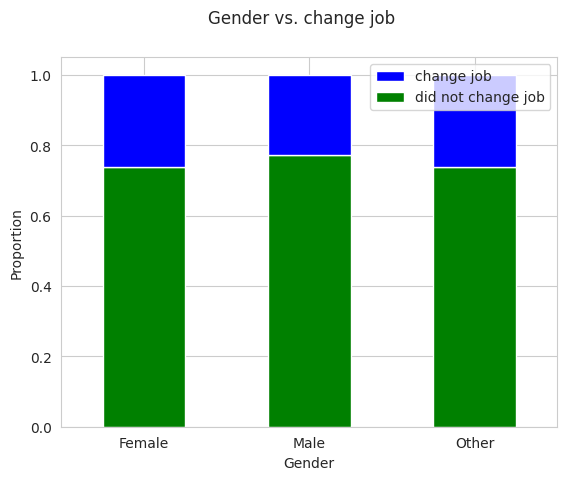

In [ ]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Gender")
ax.set_xticklabels(['Female', 'Male', 'Other'], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="change job"),
    Patch(facecolor="green", label="did not change job")
]
ax.legend(handles=color_patches)

fig.suptitle("Gender vs. change job");

## box plot

<Axes: xlabel='enrolled_university', ylabel='job_change'>

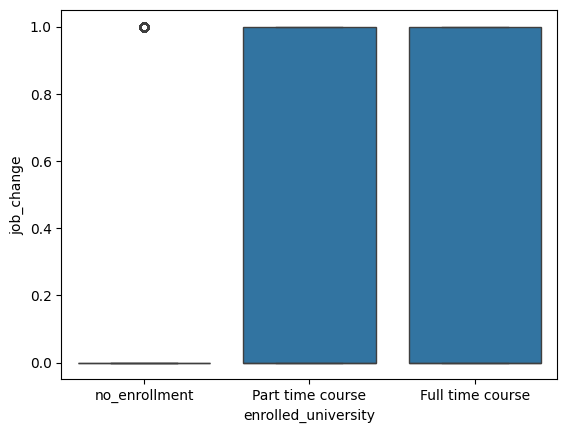

In [ ]:
sns.boxplot(data=ds_jobs_clean_cat, x = 'enrolled_university', y = 'job_change' )